<a href="https://colab.research.google.com/github/TonyHamilton10/Analytics/blob/main/AdvancedAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Online Data Analysis


- Packages Importing

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
url = 'https://data.cdc.gov/api/views/cf5u-bm9w/rows.csv?accessType=DOWNLOAD'
data  = pd.read_csv(url)
data.head()

,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type
0,Utah,2021-22,202206.0,All,All,All,36.0,Crude Rate
1,Utah,2021-22,202202.0,All,All,All,40.4,Crude Rate
2,Utah,2021-22,202203.0,All,All,All,12.1,Crude Rate
3,Utah,2021-22,202112.0,All,All,All,38.9,Crude Rate
4,Utah,2021-22,202207.0,All,All,All,34.5,Crude Rate


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41792 entries, 0 to 41791
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               41792 non-null  object 
 1   Season              41792 non-null  object 
 2   _YearMonth          41792 non-null  float64
 3   AgeCategory_Legend  41792 non-null  object 
 4   Sex_Label           41792 non-null  object 
 5   Race_Label          41792 non-null  object 
 6   MonthlyRate         40887 non-null  float64
 7   Type                41792 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
data.describe()

,_YearMonth,MonthlyRate
count,41792.000000,40887.000000
mean,202237.005671,31.776080
std,156.674013,62.157975
min,202003.000000,0.000000
25%,202106.000000,3.000000
50%,202210.000000,11.300000
75%,202402.000000,33.000000
max,202507.000000,1260.000000


In [ ]:
data['YearMonth'] = data['_YearMonth'].astype(int).astype(str).str.slice(0,4) + '-' + data['_YearMonth'].astype(int).astype(str).str.slice(4,6)
data.head()

,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type,YearMonth
0,Utah,2021-22,202206.0,All,All,All,36.0,Crude Rate,2022-06
1,Utah,2021-22,202202.0,All,All,All,40.4,Crude Rate,2022-02
2,Utah,2021-22,202203.0,All,All,All,12.1,Crude Rate,2022-03
3,Utah,2021-22,202112.0,All,All,All,38.9,Crude Rate,2021-12
4,Utah,2021-22,202207.0,All,All,All,34.5,Crude Rate,2022-07


In [ ]:
del data['_YearMonth']

In [ ]:
states = data['State'].value_counts().iloc[1:].reset_index()

px.bar(states , x = 'State' , y = 'count' , template = 'gridon' , title = 'Number of States' ,
       text=[f'{x: ,}'.format(x) for x in states['count']]  )

- Number of States Most Affected By Covid

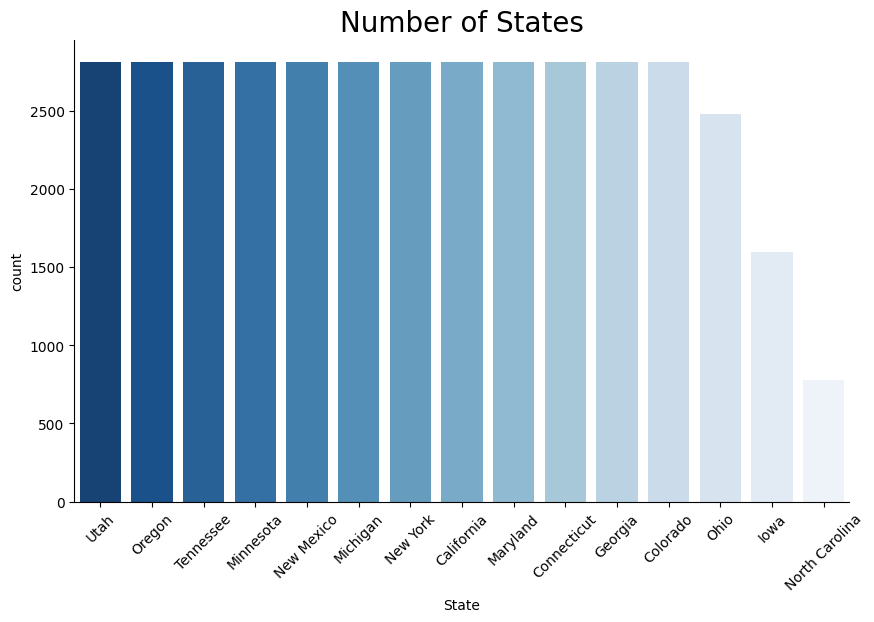

In [ ]:
fig , ax = plt.subplots(figsize = (10 , 6))
sns.barplot(x = 'State' , y = 'count' , data = states , palette='Blues_r')
plt.xticks(rotation = 45)
plt.title('Number of States' ,fontsize =20)
sns.despine()
plt.show()

In [ ]:
data.head()

,State,Season,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type,YearMonth
0,Utah,2021-22,All,All,All,36.0,Crude Rate,2022-06
1,Utah,2021-22,All,All,All,40.4,Crude Rate,2022-02
2,Utah,2021-22,All,All,All,12.1,Crude Rate,2022-03
3,Utah,2021-22,All,All,All,38.9,Crude Rate,2021-12
4,Utah,2021-22,All,All,All,34.5,Crude Rate,2022-07


In [ ]:
ages   =  data['AgeCategory_Legend'].value_counts().reset_index()

px.bar(ages , x = 'AgeCategory_Legend' , y = 'count' , template = 'gridon' , title = 'Number of Infected Per Age Group' ,
       text=[f'{x: ,}'.format(x) for x in ages['count']]  )

<Axes: ylabel='Sex_Label'>

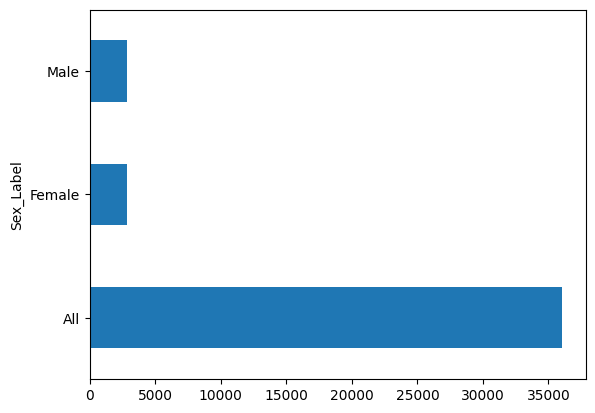

In [ ]:
data['Sex_Label'].value_counts().plot(kind = 'barh')

In [ ]:
sub_data = data[data['Sex_Label']!='All']

In [ ]:
line = data.pivot_table(index='YearMonth' , columns='Sex_Label' , values='MonthlyRate' , aggfunc='mean')

px.line(line , x = line.index , y = line.columns , template='gridon' , title='Monthly Rate Per Sex')

In [ ]:
grp = data['Race_Label'].value_counts().reset_index()

px.bar(grp , x = 'Race_Label' , y = 'count' , title ='Count by Race' , template='gridon' ,
       text = [f'{x: ,}'.format(x) for x in grp['count']])

In [ ]:
data['Type'].value_counts()

,count
Type,
Crude Rate,41467
Age adjusted Rate,325


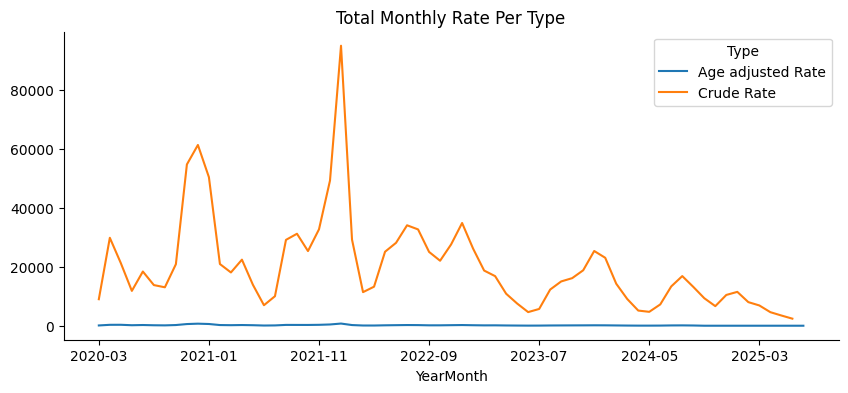

In [ ]:
data.pivot_table(  index = 'YearMonth' ,values= 'MonthlyRate' , columns = 'Type'  , aggfunc='sum').plot(kind = 'line' , figsize = (10 , 4))
plt.title('Total Monthly Rate Per Type')
sns.despine()
plt.show()

# Read Html

In [ ]:
url = 'https://data.transportation.gov/api/views/keg4-3bc2/rows.csv?accessType=DOWNLOAD'
new_data=  pd.read_csv(url)
new_data.head()


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401566 entries, 0 to 401565
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  401566 non-null  object 
 1   State      401566 non-null  object 
 2   Port Code  401566 non-null  int64  
 3   Border     401566 non-null  object 
 4   Date       401566 non-null  object 
 5   Measure    401566 non-null  object 
 6   Value      401566 non-null  int64  
 7   Latitude   401566 non-null  float64
 8   Longitude  401566 non-null  float64
 9   Point      401566 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.6+ MB


In [ ]:
grp1 = new_data['State'].value_counts().reset_index()

px.bar(grp1 , x = 'State' , y = 'count' , template='gridon' ,
       text = [f'{x: ,}'.format(x) for x  in grp1['count']] ,
       title = 'Number of States')

In [ ]:
new_data.groupby('Border')['Value'].sum()

,Value
Border,
US-Canada Border,3063728280
US-Mexico Border,8582039859


In [ ]:
new_data['Date'] = pd.to_datetime(new_data['Date'])

/tmp/ipython-input-63-3979964620.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
new_data['Year_Month'] = new_data['Date'].dt.strftime('%Y-%m')
new_data['Year'] = new_data['Date'].dt.strftime('%Y')

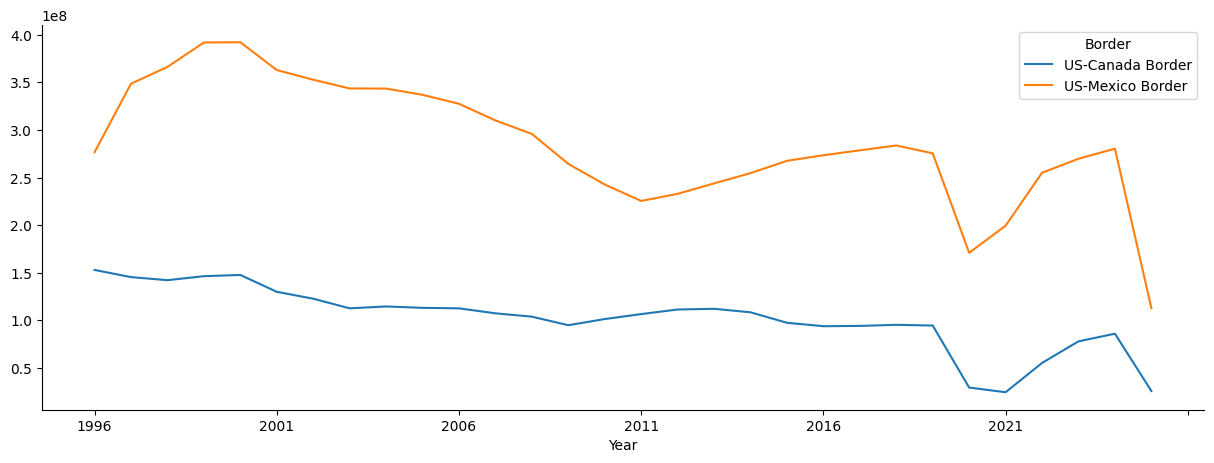

In [ ]:
new_data.pivot_table(index ='Year' , columns = 'Border' , values = 'Value' , aggfunc='sum').plot(kind =   'line' , figsize =(15 , 5))
sns.despine()

In [ ]:
yearly = new_data.pivot_table(index ='Year' , columns = 'Border' , values = 'Value' , aggfunc='sum').reset_index()

px.line(yearly  , x = 'Year' , y = yearly.columns , template = 'gridon' , title = 'US Border Entry')

In [ ]:
new_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year_Month,Year
0,Jackman,Maine,104,US-Canada Border,2024-01-01,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661),2024-01,2024
1,Porthill,Idaho,3308,US-Canada Border,2024-04-01,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861),2024-04,2024
2,San Luis,Arizona,2608,US-Mexico Border,2024-04-01,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485),2024-04,2024
3,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972),2024-01,2024
4,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999),2024-01,2024


In [ ]:
grp2 = new_data.groupby('Measure')['Value'].sum().reset_index()

px.bar(grp2 , x = 'Measure' , y = 'Value' , template='gridon' , title = 'Number Of Entry By Measure' ,
       text = [f'{x: ,}'.format(x) for x in grp2['Value']] )

In [ ]:
grp4 =new_data.groupby(['Border' , 'Measure'])['Value'].sum().reset_index()

px.bar(grp4 , x = 'Measure' , y = 'Value' , color = 'Border' , title = 'Border Entry' , text =[f'{x: ,}'.format(x) for x in grp4['Value']])

In [ ]:
new_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year_Month,Year
0,Jackman,Maine,104,US-Canada Border,2024-01-01,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661),2024-01,2024
1,Porthill,Idaho,3308,US-Canada Border,2024-04-01,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861),2024-04,2024
2,San Luis,Arizona,2608,US-Mexico Border,2024-04-01,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485),2024-04,2024
3,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972),2024-01,2024
4,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999),2024-01,2024


In [136]:
health_data = pd.read_csv('https://data.cdc.gov/api/views/25m4-6qqq/rows.csv?accessType=DOWNLOAD')
health_data.head()

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
0,Coronary heart disease,Total,Total,4.6,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019


In [137]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20140 entries, 0 to 20139
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Outcome (or Indicator)  20140 non-null  object 
 1   Grouping category       20140 non-null  object 
 2   Group                   20140 non-null  object 
 3   Percentage              20140 non-null  float64
 4   Confidence Interval     18883 non-null  object 
 5   Title                   20140 non-null  object 
 6   Description             20140 non-null  object 
 7   Year                    20140 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [138]:
new_data.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Latitude', 'Longitude', 'Point', 'Year_Month', 'Year'],
      dtype='object')

In [139]:
new_data['State'].unique()

array(['Maine', 'Idaho', 'Arizona', 'Montana', 'Minnesota', 'Texas',
       'North Dakota', 'Washington', 'Alaska', 'California', 'Michigan',
       'New York', 'New Mexico', 'Vermont'], dtype=object)

In [140]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20140 entries, 0 to 20139
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Outcome (or Indicator)  20140 non-null  object 
 1   Grouping category       20140 non-null  object 
 2   Group                   20140 non-null  object 
 3   Percentage              20140 non-null  float64
 4   Confidence Interval     18883 non-null  object 
 5   Title                   20140 non-null  object 
 6   Description             20140 non-null  object 
 7   Year                    20140 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [141]:
health_data.columns

Index(['Outcome (or Indicator)', 'Grouping category', 'Group', 'Percentage',
       'Confidence Interval', 'Title', 'Description', 'Year'],
      dtype='object')

In [156]:
grp = health_data['Grouping category'].value_counts()

px.bar(grp, x = grp.index ,y =grp , template = 'plotly_white' , title ='Categories' ,
       text = [f'{x:,}'.format(x) for x in grp])

In [151]:
health_data.head()

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
0,Coronary heart disease,Total,Total,4.6,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019


In [158]:
px.dist

,count
Group,
Private,530
Other coverage,530
Uninsured,530
Male,265
Total,265
...,...
Full-time,212
Full-Time,53
Part-Time,53


In [165]:
retail_data = pd.read_csv('https://data.montgomerycountymd.gov/api/views/v76h-r7br/rows.csv?accessType=DOWNLOAD')
retail_data.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [176]:
retail_data.groupby('ITEM TYPE')['RETAIL SALES'].sum().reset_index()

,ITEM TYPE,RETAIL SALES
0,BEER,574220.53
1,DUNNAGE,0.00
2,KEGS,0.00
3,LIQUOR,802691.43
4,NON-ALCOHOL,34084.31
5,REF,663.63
6,STR_SUPPLIES,2740.88
7,WINE,746498.59


from matplotlib import pyplot as plt
_df_0['RETAIL SALES'].plot(kind='hist', bins=20, title='RETAIL SALES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ITEM TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RETAIL SALES'].plot(kind='line', figsize=(8, 4), title='RETAIL SALES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['ITEM TYPE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='RETAIL SALES', y='ITEM TYPE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [177]:
retail_data['YEAR'].unique()

array([2020, 2017, 2018, 2019])